In [1]:
import wfdb
import numpy as np
import pandas as pd 
from acceleration_path import AccPath

In [2]:
# create CSV file
'''
short_walk.csv - Data Format:
    Time (s),Gyroscope X (deg/s),Gyroscope Y (deg/s),Gyroscope Z (deg/s),Accelerometer X (g),Accelerometer Y (g),Accelerometer Z (g)

wfdb - Data Format:
    {'fs': 100,
    'sig_len': 3000,
    'n_sig': 6,
    'base_date': None,
    'base_time': None,
    'units': ['g', 'g', 'g', 'degrees/s', 'degrees/s', 'degrees/s'],
    'sig_name': ['v-acceleration',
    'ml-acceleration',
    'ap-acceleration',
    'yaw-velocity',
    'pitch-velocity',
    'roll-velocity'],
    'comments': ['Age:75.17', 'Sex:F']}
'''
    
t_0 = 9000
t_n = 12000

signals, _ = wfdb.rdsamp('data/CO001', sampfrom=t_0, sampto=t_n)
time = np.array(range(len(signals)))/100

d = {
    'Time (s)':time,
    'Gyroscope X (deg/s)': signals[:,5], 
    'Gyroscope Y (deg/s)': signals[:,4], 
    'Gyroscope Z (deg/s)': signals[:,3], 
    'Accelerometer X (g)': signals[:,2], 
    'Accelerometer Y (g)': signals[:,1], 
    'Accelerometer Z (g)': signals[:,0]
    }
df = pd.DataFrame(data=d)
df.to_csv('data/CO001_short.csv', index = False)

In [3]:
data = np.genfromtxt("data/CO001_short.csv", delimiter=",", skip_header=1)

acc_path = AccPath(
    gyroscope=data[:, 1:4], 
    accelerometer=data[:, 4:7], 
    timestamp=data[:, 0],
    sample_rate=100)

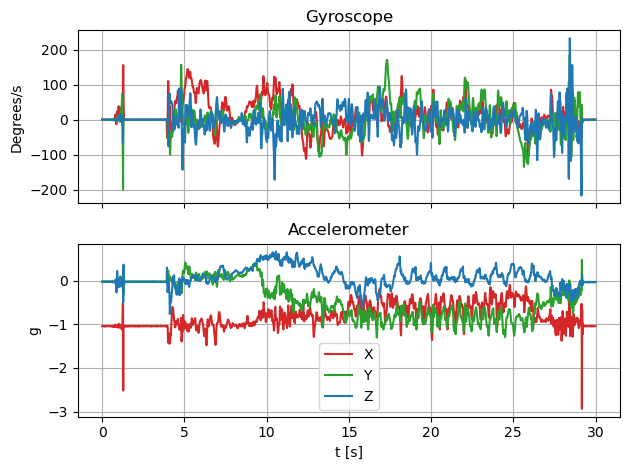

In [4]:
acc_path.plot_sensor_data()

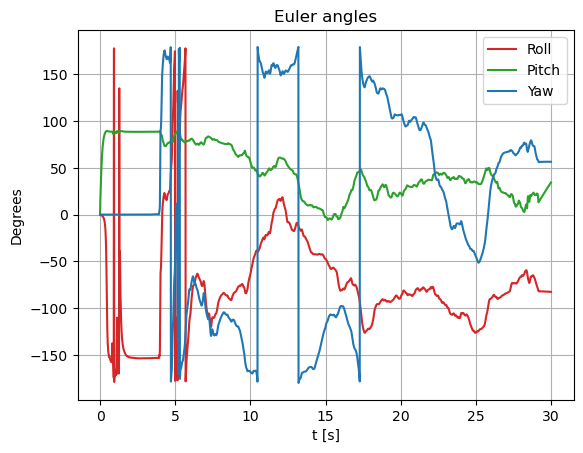

In [5]:
acc_path.plot_euler_angles()

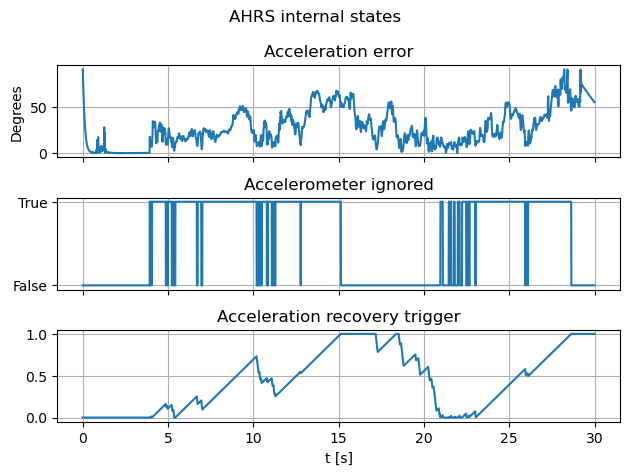

In [6]:
acc_path.plot_internal_states()

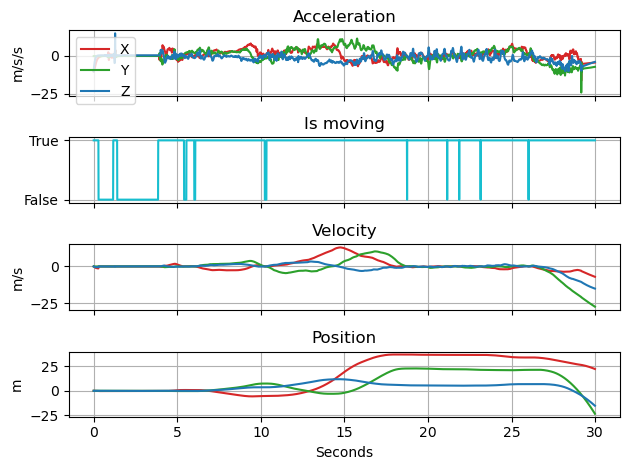

In [7]:
acc_path.plot_acceleration_velocity_position()

In [8]:
acc_path.print_distance_start_final()

Start-Final-Distance: 35.881 m


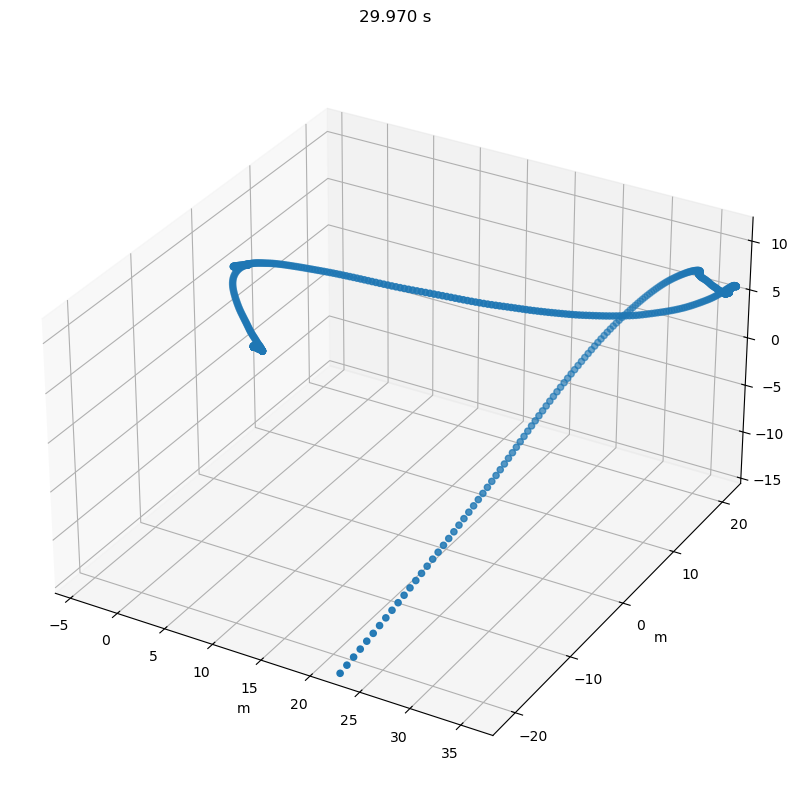

In [9]:
acc_path.create_path_animation()